### 3.6 cls

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

In [3]:
iris =load_iris()
X = iris.data 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

# Dt modeli olustur ve train et 
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

# DT evaluation test 
y_pred = tree_clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", conf_matrix)


Accuracy:  1.0
Confusion Matrix:  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


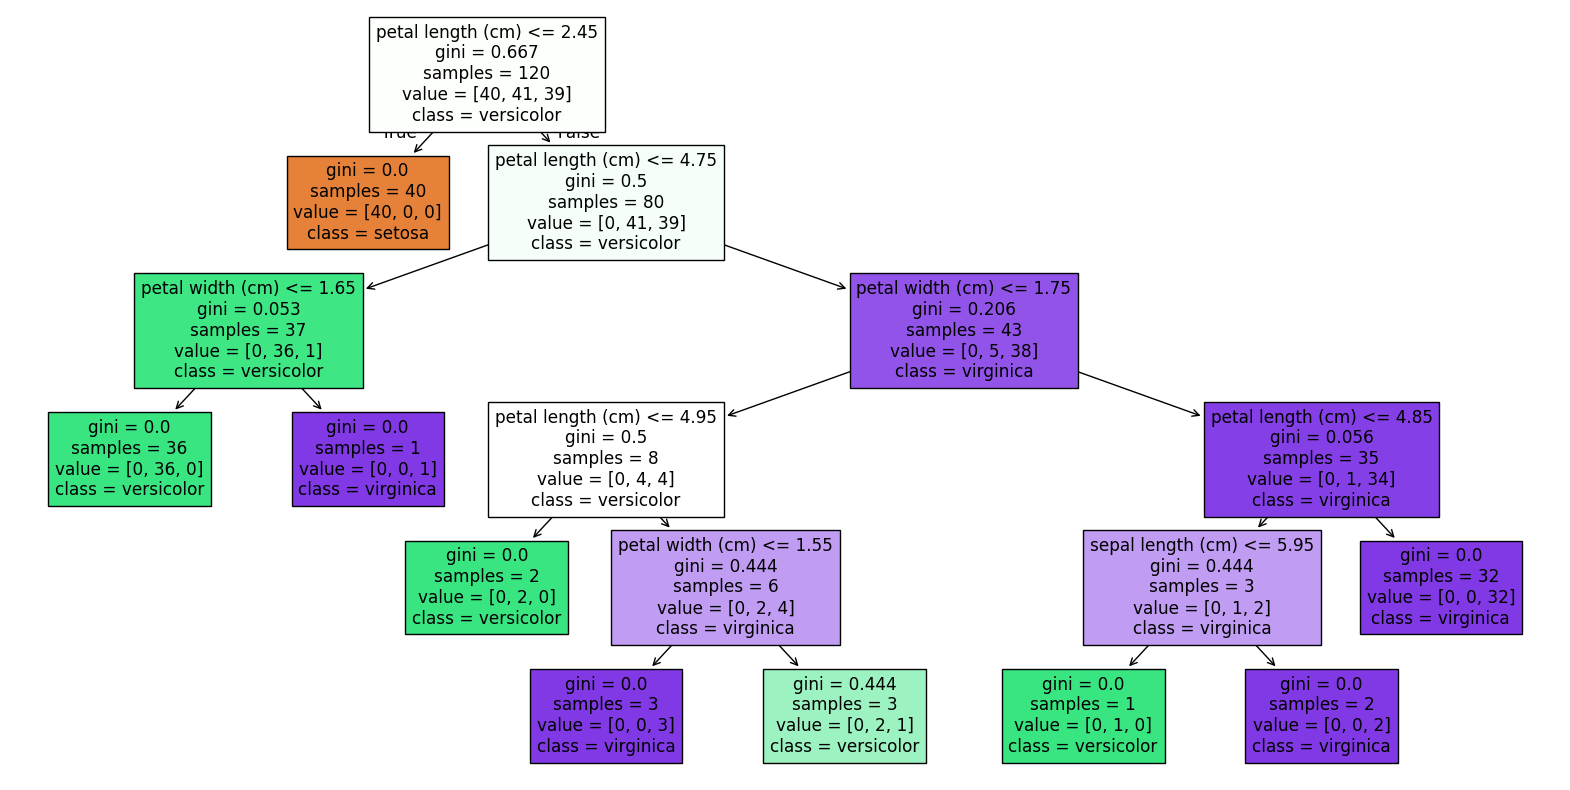

In [7]:
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [9]:
feature_imp = tree_clf.feature_importances_
feature_names = iris.feature_names
for name, imp in sorted(zip(feature_names, feature_imp),reverse=False):
    print(name, imp)

petal length (cm) 0.9045522597319637
petal width (cm) 0.07849499604256478
sepal length (cm) 0.016952744225471498
sepal width (cm) 0.0


### 3.7 cls

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

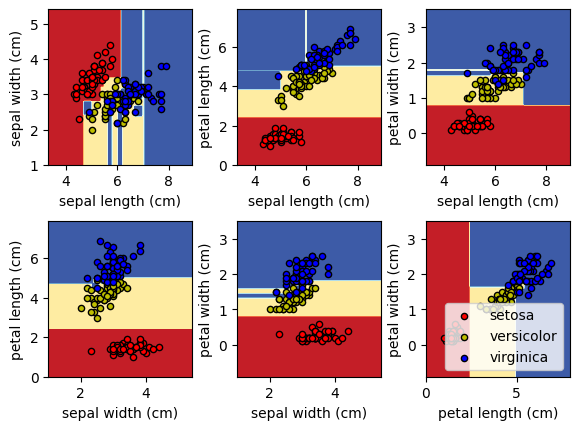

In [4]:
iris = load_iris()

n_classes = len(iris.target_names)
plot_colors = "ryb"

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier().fit(X, y)
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(clf, 
                                           X,
                                           cmap= plt.cm.RdYlBu,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=iris.feature_names[pair[0]],
                                           ylabel=iris.feature_names[pair[1]],)

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], 
                    X[idx, 1], 
                    c=color, 
                    label=iris.target_names[i], 
                    cmap=plt.cm.RdYlBu, 
                    edgecolor='black', 
                    s=20)
        
plt.legend()

### 3.8 DT REG

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np 

diabets = load_diabetes()

X = diabets.data 
y = diabets.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  4976.797752808989
Root Mean Squared Error:  70.54642267903446


### 3.9 DT Reg

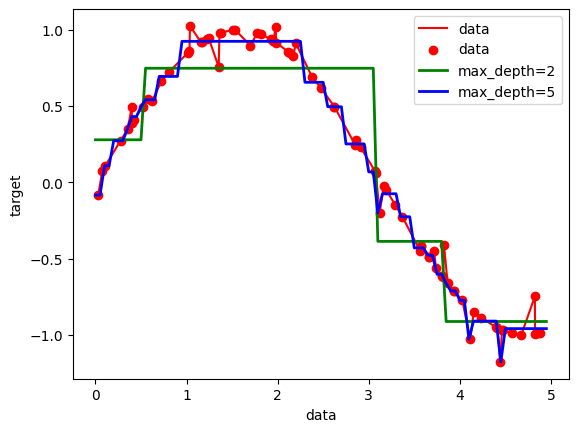

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

X = np.sort(5 * np.random.rand(80,1), axis= 0) 
y = np.sin(X).ravel()

y[::5] += 0.5 *(0.5 - np.random.rand(16))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.05)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.plot(X,y, c ="red", label = "data")
plt.scatter(X, y , c = "red", label = "data")
plt.plot(X_test, y_1, c="green", label = "max_depth=2", linewidth = 2)
plt.plot(X_test, y_2, c="blue", label = "max_depth=5", linewidth = 2)

plt.xlabel("data")
plt.ylabel("target")
plt.legend()